# Import libraries and packages

# Using Bag of Words

In [1]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
import pandas as pd 
import warnings

# Data Exploration

In [32]:
df= pd.read_csv("data/data.csv")

In [33]:
df.head()

,Tweet,Text Label
0,yeah I got 2 backups for all that. I just hate...,Non-Bullying
1,I hate using my BB but love my iPhone. Haven'...,Non-Bullying
2,Get fucking real dude.,Bullying
3,She is as dirty as they come and that crook ...,Bullying
4,why did you fuck it up. I could do it all day...,Bullying


In [34]:
df['label'] = df['Text Label'].map({'Non-Bullying': 0, 'Bullying': 1})
df['message']=df['Tweet']
df.drop(['Text Label','Tweet'],axis=1,inplace=True)

# Visualization

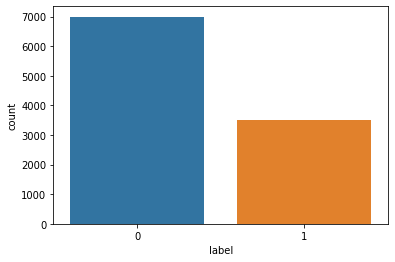

In [35]:
import seaborn as sns
sns.countplot(x="label", data = df)

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [37]:
comment_words = ''
stopwords = set(STOPWORDS)

In [38]:
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

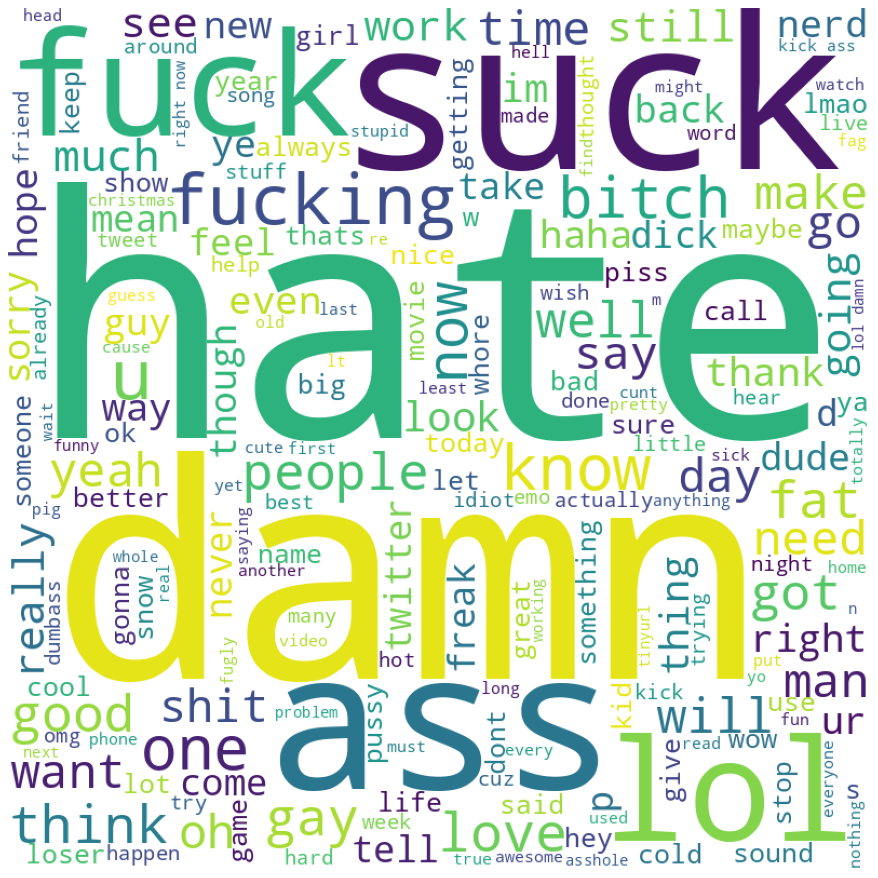

In [40]:
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Feature Selection - Formal DAta

In [41]:
X = df['message']
y = df['label']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the Sentence

In [43]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

# Splitting Data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
print(X_test.shape)
print(y_test.shape)

(3462, 15415)
(3462,)


# Machine Learning

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

[[1905  388]
 [ 660  509]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2293
           1       0.57      0.44      0.49      1169

    accuracy                           0.70      3462
   macro avg       0.66      0.63      0.64      3462
weighted avg       0.68      0.70      0.69      3462

0.6972848064702484


# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[1905  388]
 [ 660  509]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2293
           1       0.57      0.44      0.49      1169

    accuracy                           0.70      3462
   macro avg       0.66      0.63      0.64      3462
weighted avg       0.68      0.70      0.69      3462

0.6972848064702484


# AdaBoost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

[[1968  325]
 [ 690  479]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      2293
           1       0.60      0.41      0.49      1169

    accuracy                           0.71      3462
   macro avg       0.67      0.63      0.64      3462
weighted avg       0.69      0.71      0.69      3462

0.7068168688619295


# SGD Classifier

In [50]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)

[[1825  468]
 [ 629  540]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2293
           1       0.54      0.46      0.50      1169

    accuracy                           0.68      3462
   macro avg       0.64      0.63      0.63      3462
weighted avg       0.67      0.68      0.68      3462

0.6831311380704795


# KNeighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)

[[1035 1258]
 [ 361  808]]
              precision    recall  f1-score   support

           0       0.74      0.45      0.56      2293
           1       0.39      0.69      0.50      1169

    accuracy                           0.53      3462
   macro avg       0.57      0.57      0.53      3462
weighted avg       0.62      0.53      0.54      3462

0.5323512420566147


# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)

[[1647  646]
 [ 603  566]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      2293
           1       0.47      0.48      0.48      1169

    accuracy                           0.64      3462
   macro avg       0.60      0.60      0.60      3462
weighted avg       0.64      0.64      0.64      3462

0.6392258809936453


# Multinomial Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)

[[2057  236]
 [ 911  258]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      2293
           1       0.52      0.22      0.31      1169

    accuracy                           0.67      3462
   macro avg       0.61      0.56      0.55      3462
weighted avg       0.64      0.67      0.62      3462

0.6686886192952051


# Voting Classifier

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', RandomForestClassifier()),
                             ('svm', SVC())])
[[2122  171]
 [ 756  413]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      2293
           1       0.71      0.35      0.47      1169

    accuracy                           0.73      3462
   macro avg       0.72      0.64      0.65      3462
weighted avg       0.73      0.73      0.70      3462

0.7322357019064125


# Accuracy Comparsion

In [55]:
accuracies = [LR, RF, AB, SGDA, KNNA, DT, MNB, E]

In [56]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]*100 

In [57]:
models = ['Logistic Regression' , 'Random Forest', 'AdaBoost Classifier', 'SGD Classifier', 'KNN', 'Decision Tree', 'MNB', 'Voting Classifier']

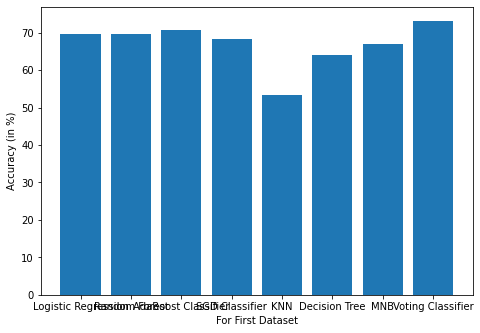

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracies)
plt.xlabel("For Bag of Words - Count Vectorizer")
plt.ylabel("Accuracy (in %)")
plt.show()

# Using Tfid 

In [2]:
df2 = pd.read_csv("data/data.csv")

In [3]:
df2.head()

,Tweet,Text Label
0,yeah I got 2 backups for all that. I just hate...,Non-Bullying
1,I hate using my BB but love my iPhone. Haven'...,Non-Bullying
2,Get fucking real dude.,Bullying
3,She is as dirty as they come and that crook ...,Bullying
4,why did you fuck it up. I could do it all day...,Bullying


# Data Processing

In [4]:
df2.Tweet = df2.Tweet.str.replace('[#,@,&]', '')

In [5]:
df2 = df2.applymap(lambda s: s.lower() if type(s) == str else s)

In [6]:
df2.head()

,Tweet,Text Label
0,yeah i got 2 backups for all that. i just hate...,non-bullying
1,i hate using my bb but love my iphone. haven'...,non-bullying
2,get fucking real dude.,bullying
3,she is as dirty as they come and that crook ...,bullying
4,why did you fuck it up. i could do it all day...,bullying


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10489 entries, 0 to 10488
Data columns (total 2 columns):
Tweet         10489 non-null object
Text Label    10489 non-null object
dtypes: object(2)
memory usage: 164.0+ KB


# Visualization

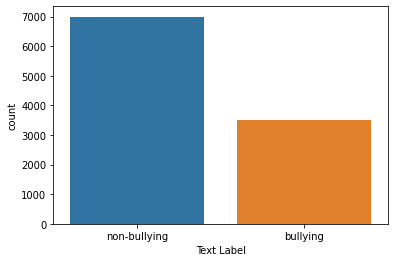

In [8]:
import seaborn as sns
sns.countplot(x="Text Label", data = df2)

In [11]:
comment_words = ''
stopwords = set(STOPWORDS)

In [15]:
for val in df2.Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [16]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

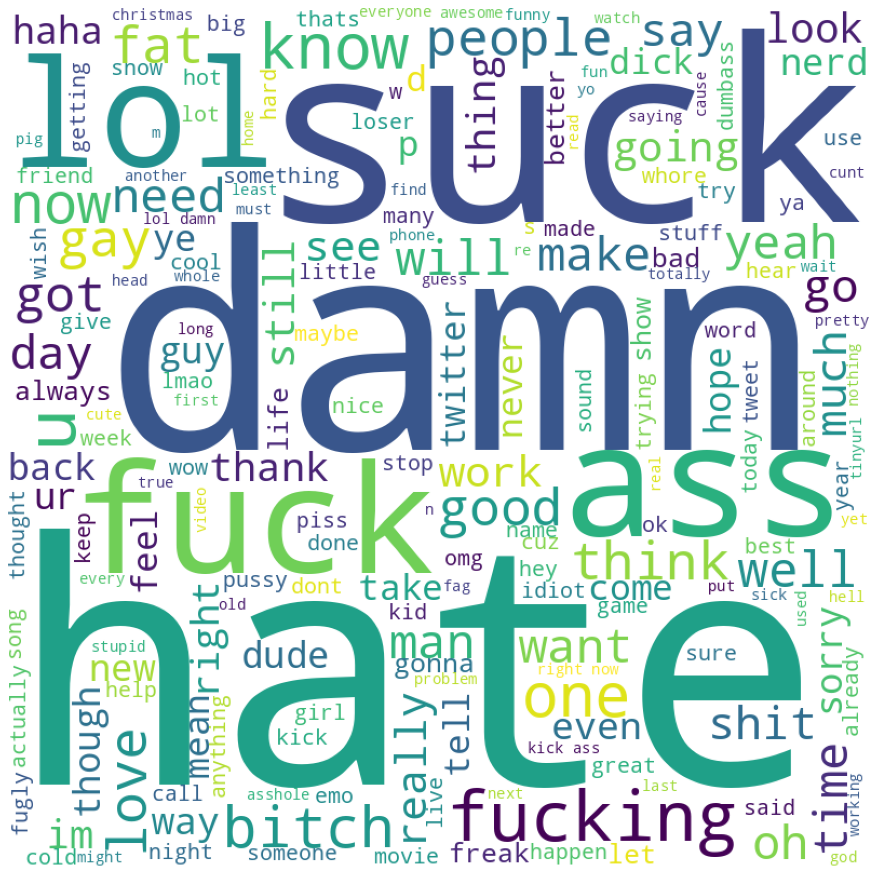

In [17]:
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Feature Selection

In [18]:
X = df2['Tweet']
y = df2['Text Label']

# Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(X).toarray()

In [20]:
X.shape

(10489, 2715)

# Data Splitting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

[[ 252  917]
 [ 170 2123]]
              precision    recall  f1-score   support

    bullying       0.60      0.22      0.32      1169
non-bullying       0.70      0.93      0.80      2293

    accuracy                           0.69      3462
   macro avg       0.65      0.57      0.56      3462
weighted avg       0.66      0.69      0.63      3462

0.6860196418255343


# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[ 252  917]
 [ 170 2123]]
              precision    recall  f1-score   support

    bullying       0.60      0.22      0.32      1169
non-bullying       0.70      0.93      0.80      2293

    accuracy                           0.69      3462
   macro avg       0.65      0.57      0.56      3462
weighted avg       0.66      0.69      0.63      3462

0.6860196418255343


# AdaBoost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

[[ 298  871]
 [ 280 2013]]
              precision    recall  f1-score   support

    bullying       0.52      0.25      0.34      1169
non-bullying       0.70      0.88      0.78      2293

    accuracy                           0.67      3462
   macro avg       0.61      0.57      0.56      3462
weighted avg       0.64      0.67      0.63      3462

0.6675332177931831


# SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)

/home/user/test/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[ 247  922]
 [ 201 2092]]
              precision    recall  f1-score   support

    bullying       0.55      0.21      0.31      1169
non-bullying       0.69      0.91      0.79      2293

    accuracy                           0.68      3462
   macro avg       0.62      0.56      0.55      3462
weighted avg       0.65      0.68      0.63      3462

0.6756210283073368


# KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)

[[1021  148]
 [1885  408]]
              precision    recall  f1-score   support

    bullying       0.35      0.87      0.50      1169
non-bullying       0.73      0.18      0.29      2293

    accuracy                           0.41      3462
   macro avg       0.54      0.53      0.39      3462
weighted avg       0.60      0.41      0.36      3462

0.4127671865973426


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)

[[ 529  640]
 [ 557 1736]]
              precision    recall  f1-score   support

    bullying       0.49      0.45      0.47      1169
non-bullying       0.73      0.76      0.74      2293

    accuracy                           0.65      3462
   macro avg       0.61      0.60      0.61      3462
weighted avg       0.65      0.65      0.65      3462

0.6542461005199307


# Multinomial Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)

[[ 203  966]
 [ 132 2161]]
              precision    recall  f1-score   support

    bullying       0.61      0.17      0.27      1169
non-bullying       0.69      0.94      0.80      2293

    accuracy                           0.68      3462
   macro avg       0.65      0.56      0.53      3462
weighted avg       0.66      0.68      0.62      3462

0.682842287694974


# Voting Classifier

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', RandomForestClassifier()),
                             ('svm', SVC())])
[[ 377  792]
 [ 146 2147]]
              precision    recall  f1-score   support

    bullying       0.72      0.32      0.45      1169
non-bullying       0.73      0.94      0.82      2293

    accuracy                           0.73      3462
   macro avg       0.73      0.63      0.63      3462
weighted avg       0.73      0.73      0.69      3462

0.7290583477758521


# Accuracy Comparsion

In [35]:
accuracies = [LR, RF, AB, SGDA, KNNA, DT, MNB, E]

In [36]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]*100

In [37]:
models = ['Logistic Regression' , 'Random Forest', 'AdaBoost Classifier', 'SGD Classifier', 'KNN', 'Decision Tree', 'MNB', 'Voting Classifier']

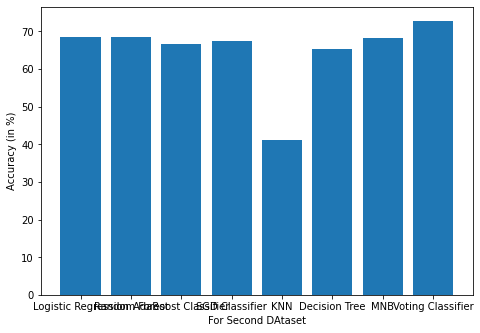

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracies)
plt.xlabel("For TFID Vectorizer")
plt.ylabel("Accuracy (in %)")
plt.show()